<a href="https://colab.research.google.com/github/newguy7/DataScienceBootCamp/blob/main/Projects/Classification_for_sale_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# load the dataset
df = pd.read_csv('sale_type_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.shape
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")

Data has 1460 rows and 81 columns.


In [ ]:
# check for missing values
missing_values = df.isna().values.any()
print(f"Missing values in the data frame? : {missing_values}")

Missing values in the data frame? : True


In [ ]:
# drop columns [Alley,PoolQC,Fence,MiscFeature]

clean_df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)


In [ ]:
# fill the rows with NA value
clean_df.fillna(0,inplace=True)
clean_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
# check for missing values
missing_values = clean_df.isna().values.any()
print(f"Missing values in the data frame? : {missing_values}")

Missing values in the data frame? : False


In [ ]:
# Seperate data into features and label

# Label data
Y = clean_df['SaleCondition']
Y

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [ ]:
# Feature Data
X = clean_df.drop(['SaleCondition'],axis=1)
X.shape

(1460, 76)

In [ ]:
# pick the columns with string datas only
categorical_features = X.loc[:,X.dtypes==object]

categorical_col = categorical_features.columns

# numerical_col = X.loc[:,X.dtypes!=object].columns
numerical_features = X.drop(categorical_col,axis=1)



In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# bringing the numerical datas to normal range
scaler = StandardScaler()
scaler.fit(numerical_features)
print(scaler.mean_)

numerical_features = scaler.transform(numerical_features)

# One hot encoding for categorical features

# Since the null values were filled with 0
categorical_X = categorical_features.astype(str)

# Create instance of OneHotEncoder
ENCODER = OneHotEncoder()
ENCODER.fit(categorical_X)
print(ENCODER.categories_)
encoded_categorical_X = ENCODER.transform(categorical_X).toarray()

# Concatenate both numerical features and encoded categorical features
features_data = np.concatenate([numerical_features,encoded_categorical_X],axis=1)
# features_data


[7.30500000e+02 5.68972603e+01 5.76232877e+01 1.05168281e+04
 6.09931507e+00 5.57534247e+00 1.97126781e+03 1.98486575e+03
 1.03117123e+02 4.43639726e+02 4.65493151e+01 5.67240411e+02
 1.05742945e+03 1.16262671e+03 3.46992466e+02 5.84452055e+00
 1.51546370e+03 4.25342466e-01 5.75342466e-02 1.56506849e+00
 3.82876712e-01 2.86643836e+00 1.04657534e+00 6.51780822e+00
 6.13013699e-01 1.86873973e+03 1.76712329e+00 4.72980137e+02
 9.42445205e+01 4.66602740e+01 2.19541096e+01 3.40958904e+00
 1.50609589e+01 2.75890411e+00 4.34890411e+01 6.32191781e+00
 2.00781575e+03 1.80921196e+05]
[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object), array(['Grvl', 'Pave'], dtype=object), array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object), array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object), array(['AllPub', 'NoSeWa'], dtype=object), array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object), array(['Gtl', 'Mod', 'Sev'], dtype=object), array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'Co

In [ ]:
# check the unique values in Label column
Y.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [ ]:
# One hot encoding for Label
label_encoded = []
for k in Y:
  if k=='Normal':
    label_encoded.append(0)
  elif k == 'Abnorml':
    label_encoded.append(1)
  elif k == 'Partial':
    label_encoded.append(2)
  elif k == 'AdjLand':
    label_encoded.append(3)
  elif k == 'Alloca':
    label_encoded.append(4)
  elif k == 'Family':
    label_encoded.append(5)
print(label_encoded)

#reshape(#rows,#columns)
# -1 allows NumPy to figure out how many rows are needed to fit all the elements into a single column
label_array = np.array(label_encoded).reshape(-1,1)

# ENCODER = OneHotEncoder()
ENCODER.fit(label_array)
print(ENCODER.categories_)
encoded_Y = ENCODER.transform(label_array).toarray()
encoded_Y

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 5, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features_data,encoded_Y,test_size=.2)

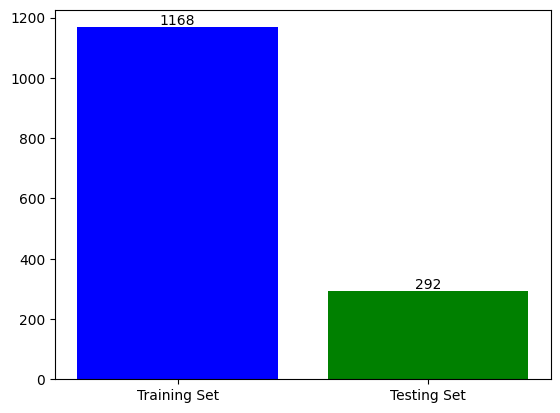

In [ ]:
import matplotlib.pyplot as plt

# plot bar chart
x_labels_list = ['Training Set', 'Testing Set']
y_values_list = [len(X_train), len(X_test)]

plt.bar(x_labels_list,y_values_list,color=['blue','green'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Model TRAINING; pass features and labels
knn.fit(X_train,y_train)

# Model PREDICTION. Pass Testing features only.
pred_labels_knn = knn.predict(X_test)

print(pred_labels_knn[1])
print(y_test[1])

# Convert arrays to lists for comparison
y_pred_list = pred_labels_knn.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy = 0
for x in range(len(pred_labels_knn)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy += 1
accuracy = (accuracy/len(pred_labels_knn)*100)
print(f"The accuracy of the KNN Model is {round(accuracy,2)}%")


[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
The accuracy of the KNN Model is 79.45%


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

pred_labels_dec_tree = dec_tree.predict(X_test)
print(pred_labels_dec_tree)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
# Convert arrays to lists for comparison
y_pred_list = pred_labels_dec_tree.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy = 0
for x in range(len(pred_labels_dec_tree)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy += 1
accuracy = (accuracy/len(pred_labels_dec_tree)*100)
print(f"The accuracy of the Decision Tree Model is {round(accuracy,2)}%")

The accuracy of the Decision Tree Model is 82.53%


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,y_train)

pred_lbls_rf = random.predict(X_test)
pred_lbls_rf.shape
print(pred_lbls_rf)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
# Convert arrays to lists for comparison
y_pred_list = pred_lbls_rf.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy = 0
for x in range(len(y_pred_list)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy += 1
accuracy = (accuracy/len(y_pred_list)*100)
print(f"The accuracy of the Random Forest Model is {round(accuracy,2)}%")

The accuracy of the Random Forest Model is 88.01%
